/var/folders/rm/syy2v85514n352llwkjcj9g00000gn/T/ipykernel_53404/116983798.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3)


red ['/Users/lerfich/Documents/lab01/tlights/100_07.jpg', '/Users/lerfich/Documents/lab01/tlights/100_01.jpg', '/Users/lerfich/Documents/lab01/tlights/100_08.jpg', '/Users/lerfich/Documents/lab01/tlights/100_20.jpg', '/Users/lerfich/Documents/lab01/tlights/200_15.jpg', '/Users/lerfich/Documents/lab01/tlights/200_05.jpg']
green ['/Users/lerfich/Documents/lab01/tlights/200_08.jpg', '/Users/lerfich/Documents/lab01/tlights/200_23.jpg', '/Users/lerfich/Documents/lab01/tlights/200_22.jpg', '/Users/lerfich/Documents/lab01/tlights/200_25.jpg', '/Users/lerfich/Documents/lab01/tlights/200_19.jpg', '/Users/lerfich/Documents/lab01/tlights/200_18.jpg', '/Users/lerfich/Documents/lab01/tlights/100_04.jpg', '/Users/lerfich/Documents/lab01/tlights/100_10.jpg', '/Users/lerfich/Documents/lab01/tlights/100_11.jpg', '/Users/lerfich/Documents/lab01/tlights/100_05.jpg', '/Users/lerfich/Documents/lab01/tlights/100_13.jpg', '/Users/lerfich/Documents/lab01/tlights/100_06.jpg', '/Users/lerfich/Documents/lab01/tl

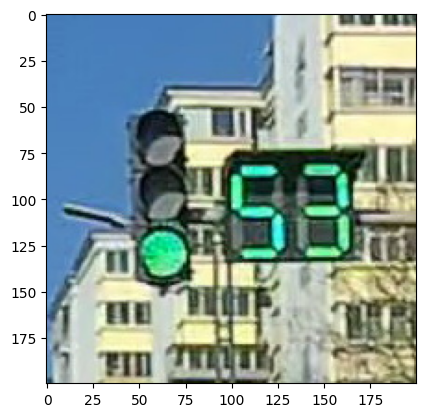

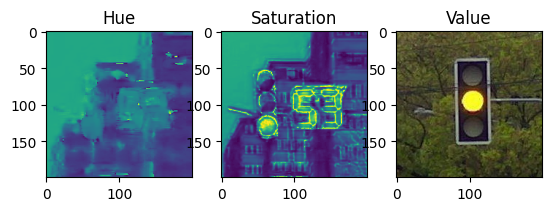

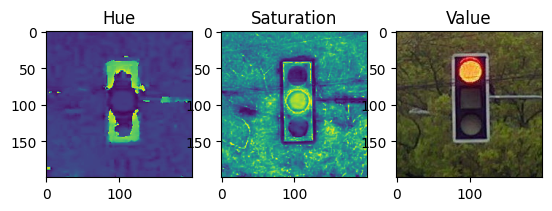

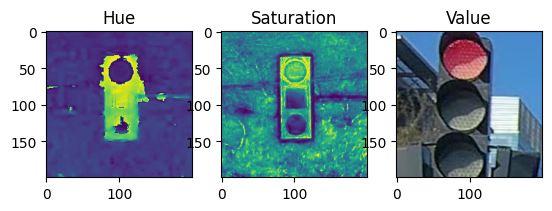

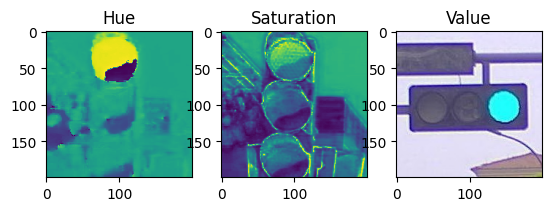

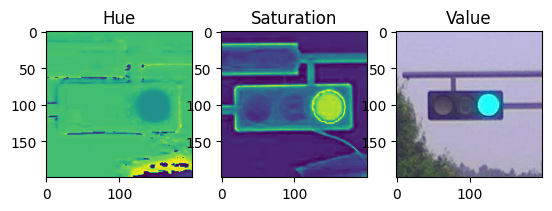

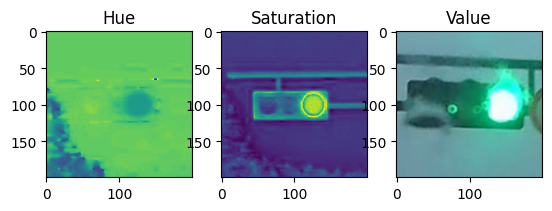

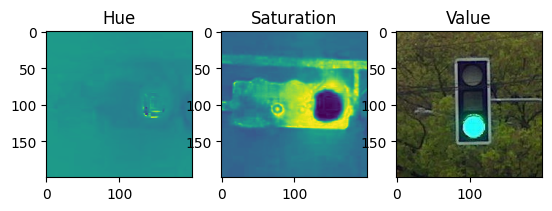

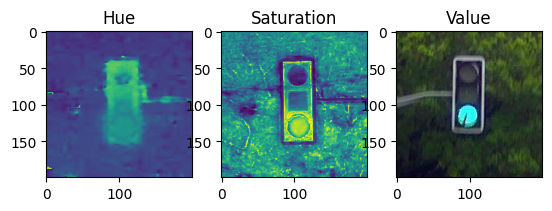

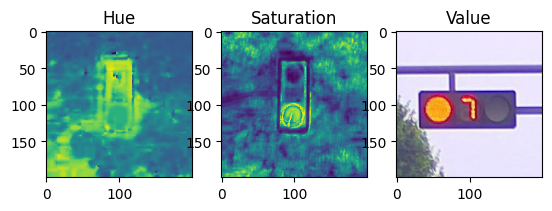

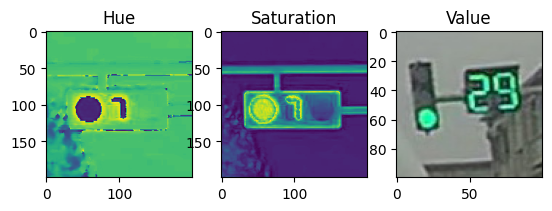

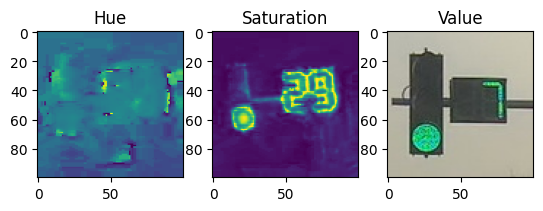

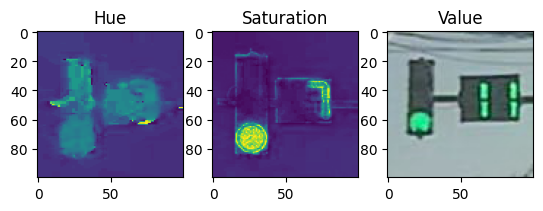

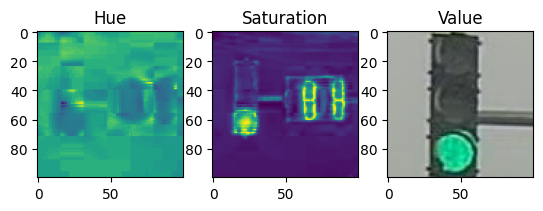

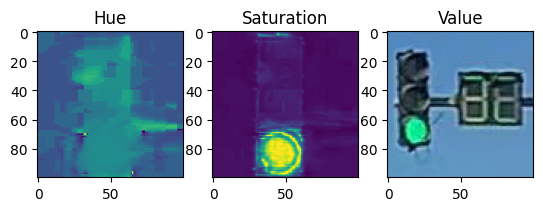

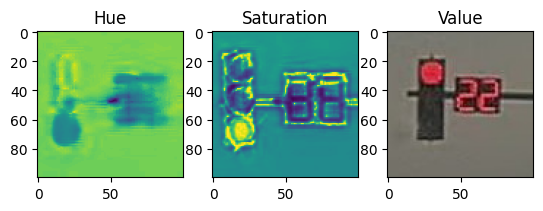

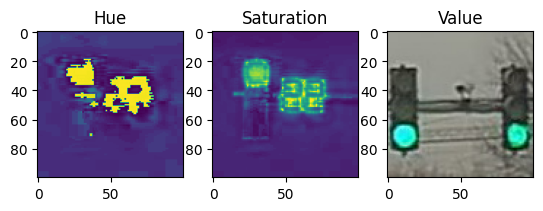

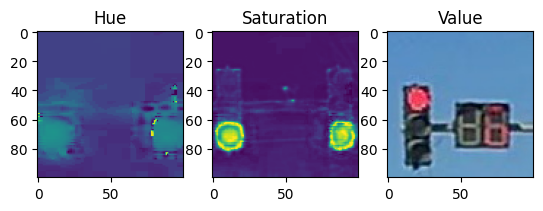

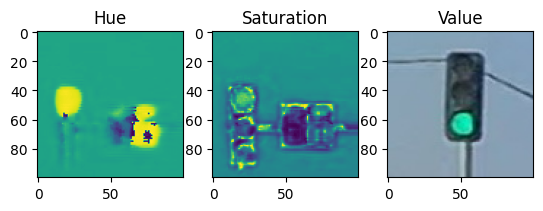

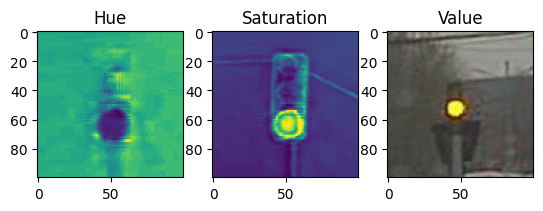

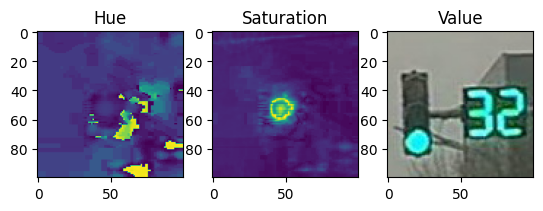

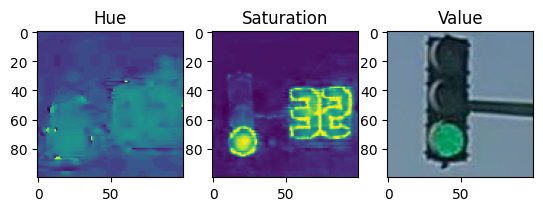

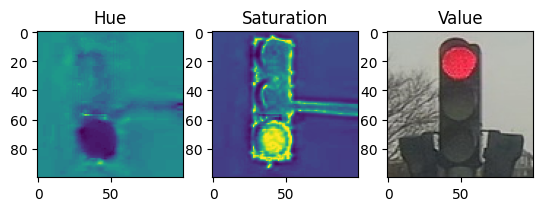

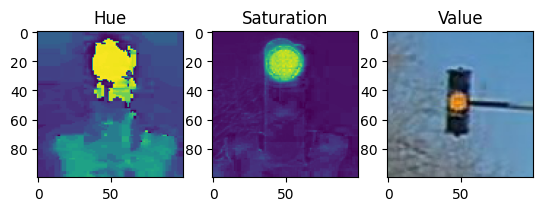

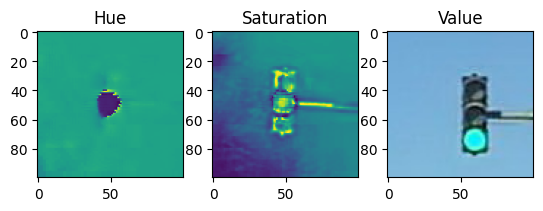

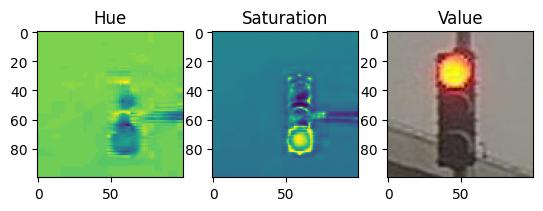

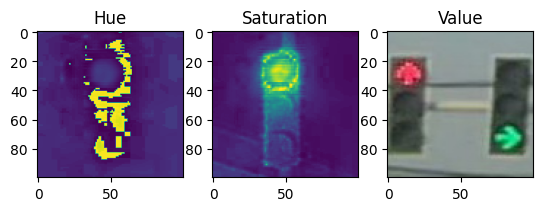

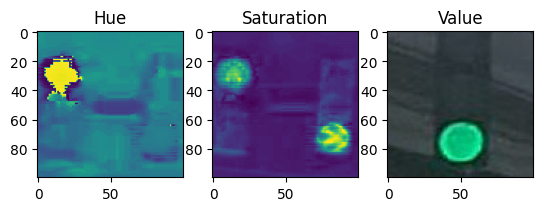

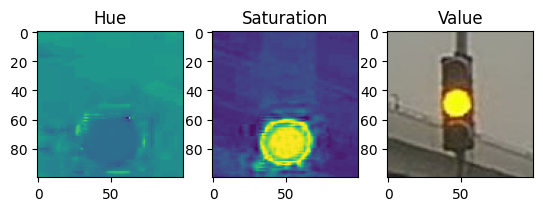

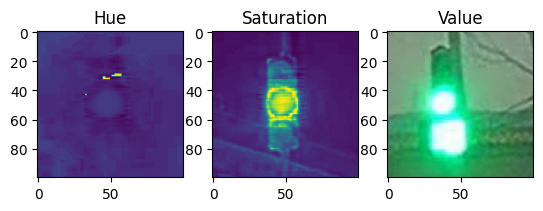

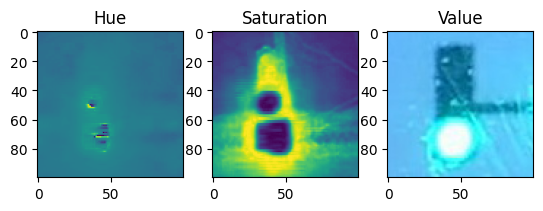

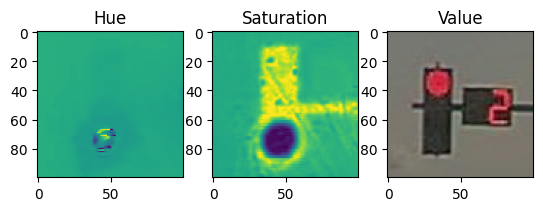

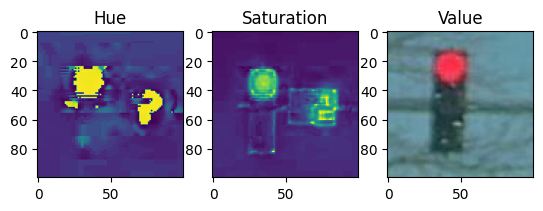

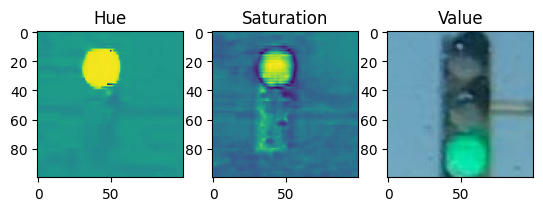

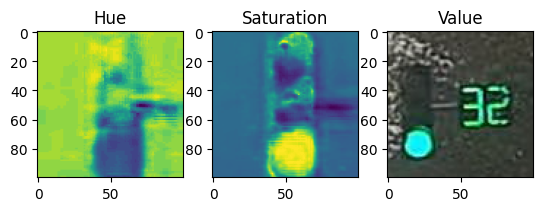

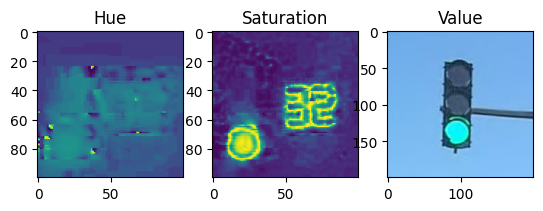

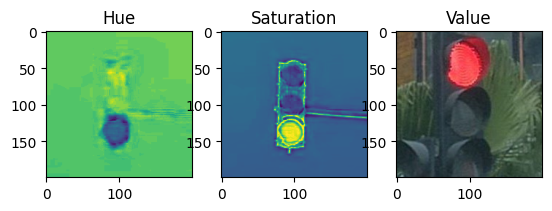

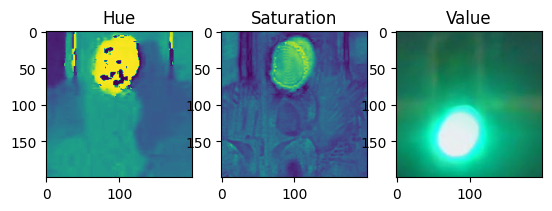

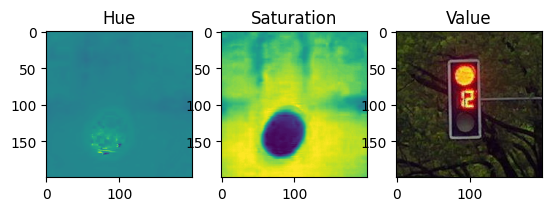

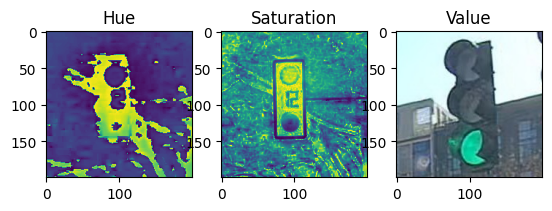

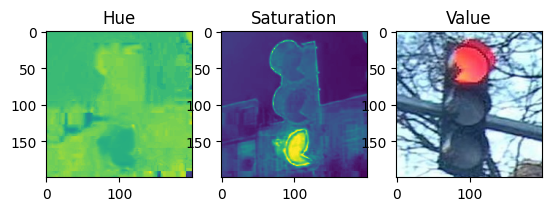

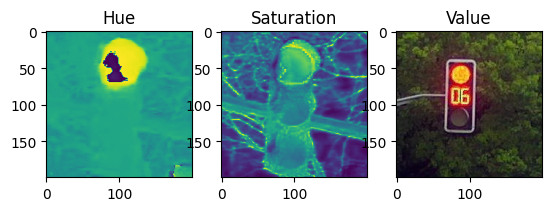

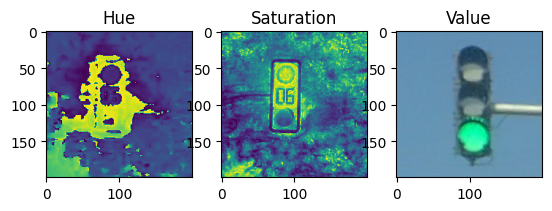

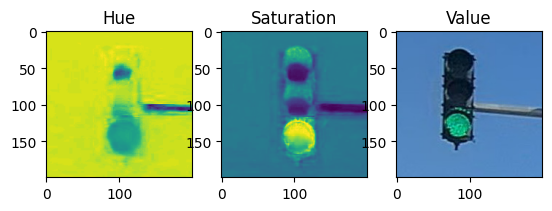

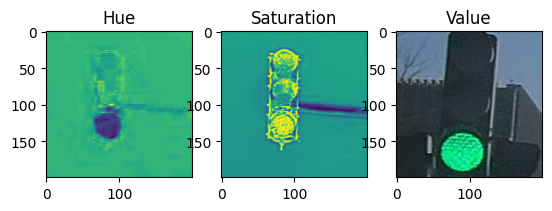

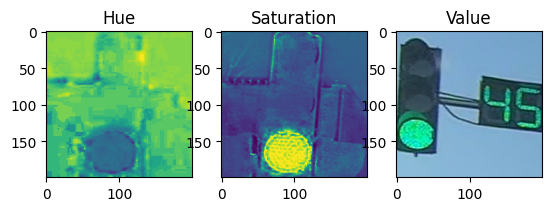

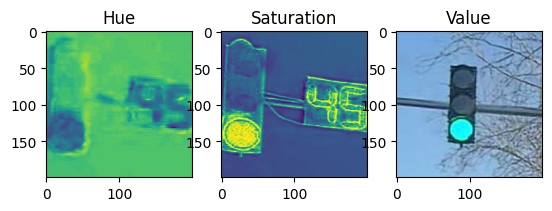

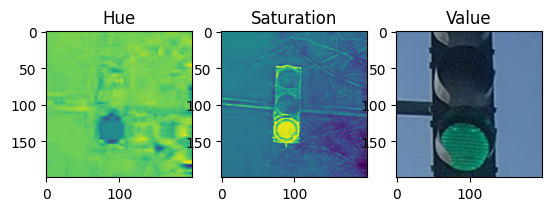

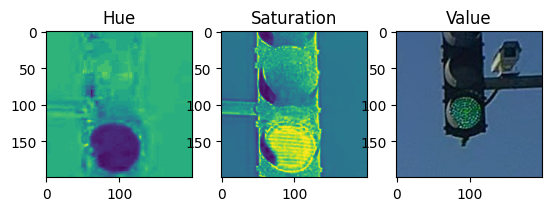

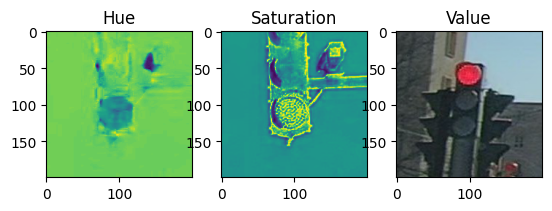

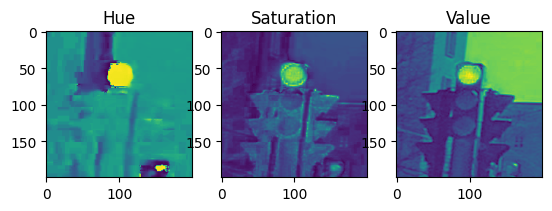

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski          
import glob

def func(file_name): 

    img_bgr = cv.imread(file_name)
    img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)

    img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(img_hsv[:,:,0])
    ax1.set_title("Hue")
    ax2.imshow(img_hsv[:,:,1])
    ax2.set_title("Saturation")
    ax3.imshow(img_hsv[:,:,2])
    ax3.set_title("Value")



    wellplate = np.copy(img_rgb)
    mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
    x = np.where( (img_hsv[:,:,1]>100) & (img_hsv[:,:,1]<250) )
    mask[x] = 1

    masked_img = wellplate[:]
    masked_img[np.logical_not(mask)] = 0

    colors_histograms = []

    colors = ("red", "green", "blue")

    for (channel_id, color) in enumerate(colors):
        
        histogram, bin_edges = np.histogram(
            masked_img[:, :, channel_id][mask], bins=256, range=(0, 256)
        )

        colors_histograms.append(histogram)


    # добавим порог 150 чтобы различать наиболее отчетливые оттенки цветов
    THRESHOLD_COLOR = 150
    present_colors = []

    red_color_file_names = []
    green_color_file_names = []
    yellow_color_file_names = []
    cant_find_color_names = []


    for (channel_id, color) in enumerate(colors):
        significant_bits = len([1 for intensity in colors_histograms[channel_id][THRESHOLD_COLOR:] if intensity >= 1])
        if (significant_bits > 30):
            present_colors.append(channel_id)


    if (len(present_colors) == 2):
        if (present_colors[0] == 0) & (present_colors[1] == 1):
            # print('red+green=  YELLOW')
            return ['yellow', file_name]
            # yellow_color_file_names.append(file_name)
        elif ((present_colors[0] == 1) & (present_colors[1] == 2)):
            # print('GREEN')
            return ['green', file_name]
            # green_color_file_names.append(file_name)
        else:
            # print('Doesnt match any color') 
            return ['nocolor', file_name]
            # cant_find_color_names.append(file_name)  
    elif (len(present_colors) == 1):
        if (present_colors[0] == 0):
            # print('RED')
            return ['red', file_name]
            # red_color_file_names.append(file_name)
        elif (present_colors[0] == 1):
            # print('GREEN')
            return ['green', file_name]
            # green_color_file_names.append(file_name)
        else:        
            # print('Doesnt match any color')    
            # cant_find_color_names.append(file_name)
            return ['nocolor', file_name]
    else: 
        # print('Doesnt match any color')  
        # cant_find_color_names.append(file_name)
        return ['nocolor', file_name]


images = [func(file) for file in glob.glob('/Users/lerfich/Documents/lab01/tlights/*.jpg')]

green = []
red = []
yellow = []
nocolor = []

for image in images:
    # print(image[0])
    if (image[0] == 'green'):
        green.append(image[1])
    elif (image[0] == 'yellow'):
        yellow.append(image[1])
    elif (image[0] == 'red'):
        red.append(image[1])
    else: 
        nocolor.append(image[1])     

print('red', red)
print('green', green)
print('yellow', yellow)
print('nocolor', nocolor)                       




